In [1]:
#importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
cd /content/drive/"MyDrive/"

/content/drive/MyDrive


In [7]:

dataset = pd.read_csv('Colab Notebooks/Linear Regression/time_series_covid19_confirmed_US.csv')


In [8]:
dataset

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,1/2/22,1/3/22,1/4/22,1/5/22,1/6/22,1/7/22,1/8/22,1/9/22,1/10/22,1/11/22
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,11184,11256,11347,11478,11638,11789,11856,11975,12029,12102
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,40396,40549,40838,41312,41855,42391,42738,43285,43583,43896
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,3932,3961,3999,4036,4101,4150,4180,4263,4305,4375
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,4576,4594,4616,4680,4730,4815,4857,4914,4939,5007
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,11338,11368,11430,11497,11587,11690,11749,11828,11893,11965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3337,84056039,US,USA,840,56039.0,Teton,Wyoming,US,43.935225,-110.589080,...,5950,6273,6452,6581,6836,7025,7025,7025,7312,7533
3338,84056041,US,USA,840,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,...,4154,4173,4191,4220,4245,4264,4264,4264,4316,4367
3339,84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
3340,84056043,US,USA,840,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,...,1880,1886,1892,1903,1909,1915,1915,1915,1923,1938


Analysing the dataset

In [9]:
dataset.shape

(3342, 732)

In [10]:
type(dataset)

pandas.core.frame.DataFrame

In [11]:

dataf= pd.DataFrame(dataset)

In [12]:
dataf.describe()

,UID,code3,FIPS,Lat,Long_,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,1/2/22,1/3/22,1/4/22,1/5/22,1/6/22,1/7/22,1/8/22,1/9/22,1/10/22,1/11/22
count,3.342000e+03,3342.000000,3332.000000,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000,3342.000000,...,3.342000e+03,3.342000e+03,3.342000e+03,3.342000e+03,3.342000e+03,3.342000e+03,3.342000e+03,3.342000e+03,3.342000e+03,3.342000e+03
mean,8.342992e+07,834.494913,33043.078932,36.721617,-88.642045,0.000299,0.000299,0.000598,0.000598,0.001496,...,1.648923e+04,1.683973e+04,1.707888e+04,1.726541e+04,1.750085e+04,1.777040e+04,1.788373e+04,1.798042e+04,1.841894e+04,1.864407e+04
std,4.314076e+06,36.487378,18648.808931,9.079322,21.776287,0.017298,0.017298,0.024459,0.024459,0.038656,...,5.503617e+04,5.621856e+04,5.691185e+04,5.759918e+04,5.854968e+04,6.011494e+04,6.072293e+04,6.144003e+04,6.275196e+04,6.366054e+04
min,1.600000e+01,16.000000,60.000000,-14.271000,-174.159600,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.401811e+07,840.000000,19076.500000,33.896803,-97.803595,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.682250e+03,1.703500e+03,1.716750e+03,1.733500e+03,1.756500e+03,1.761750e+03,1.769750e+03,1.772750e+03,1.792500e+03,1.806000e+03
50%,8.402921e+07,840.000000,31012.000000,38.005610,-89.488865,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.248500e+03,4.298500e+03,4.343500e+03,4.391000e+03,4.436500e+03,4.462500e+03,4.501500e+03,4.516000e+03,4.541500e+03,4.580500e+03
75%,8.404612e+07,840.000000,47129.500000,41.579255,-82.313398,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.118850e+04,1.131575e+04,1.143600e+04,1.148675e+04,1.161175e+04,1.169300e+04,1.181175e+04,1.183625e+04,1.197175e+04,1.207750e+04
max,8.410000e+07,850.000000,99999.000000,69.314792,145.673900,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.741292e+06,1.757522e+06,1.780154e+06,1.806828e+06,1.843922e+06,1.887526e+06,1.921890e+06,1.967443e+06,2.010964e+06,2.046208e+06


In [13]:
col = list(dataset.columns.values)
print(col)

['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Lat', 'Long_', 'Combined_Key', '1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20', '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20', '4/8/20', '4/9/20', '4/10/20', '4/11/20', '4/12/20', '4/13/

In [14]:

col_value = (list(dataf.sum(axis = 0, skipna = True)))
#print(col_value)
df1 = pd.DataFrame(list(zip(col, col_value)),columns =['Title', 'Values'])

#df1.set_index('Title',inplace=True)
#print(df1)
#df1.drop(df1.index[["Province/State"]])

data = df1.drop(df1.index)
print(df1)



       Title                                             Values
0        UID                                       278822801147
1       iso2  USUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUS...
2       iso3  USAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAU...
3      code3                                            2788882
4       FIPS                                        110099539.0
..       ...                                                ...
726   1/6/22                                           59388686
727   1/7/22                                           59767418
728   1/8/22                                           60090560
729   1/9/22                                           61556085
730  1/10/22                                           62308472

[731 rows x 2 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [15]:
col1 = list(df1.columns.values)
print(col1)


['Title', 'Values']


In [16]:
x_value=df1.iloc[11:,0:1]
y_value=df1.iloc[11:,1:2]

In [17]:
x_value

,Title
11,1/22/20
12,1/23/20
13,1/24/20
14,1/25/20
15,1/26/20
...,...
726,1/6/22
727,1/7/22
728,1/8/22
729,1/9/22


In [18]:

y_value

,Values
11,1
12,2
13,2
14,5
15,5
...,...
726,59388686
727,59767418
728,60090560
729,61556085


In [19]:
#cleaning the dataset
#remove the na values
training_dataset=df1
cleaned_dataset=training_dataset.dropna()

In [20]:
cleaned_dataset.shape

(731, 2)

In [21]:
cleaned_dataset

,Title,Values
0,UID,278822801147
1,iso2,USUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUS...
2,iso3,USAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAU...
3,code3,2788882
4,FIPS,110099539.0
...,...,...
726,1/6/22,59388686
727,1/7/22,59767418
728,1/8/22,60090560
729,1/9/22,61556085


In [22]:
x_new = cleaned_dataset['Title']

In [23]:
y_new = cleaned_dataset['Values']

In [24]:
x_value1=cleaned_dataset.iloc[11:,0:1]
y_value1=cleaned_dataset.iloc[11:,1:2]
print(x_value1)


       Title
11   1/22/20
12   1/23/20
13   1/24/20
14   1/25/20
15   1/26/20
..       ...
726   1/6/22
727   1/7/22
728   1/8/22
729   1/9/22
730  1/10/22

[720 rows x 1 columns]


In [26]:
x_train = x_value1.values.reshape(x_value1.size)

In [27]:
y_train = y_value1.values.reshape(y_value1.size)

In [28]:
dates = x_value1['Title']
#print(dates)
date_format = [pd.to_datetime(d) for d in dates]
print(date_format)

[Timestamp('2020-01-22 00:00:00'), Timestamp('2020-01-23 00:00:00'), Timestamp('2020-01-24 00:00:00'), Timestamp('2020-01-25 00:00:00'), Timestamp('2020-01-26 00:00:00'), Timestamp('2020-01-27 00:00:00'), Timestamp('2020-01-28 00:00:00'), Timestamp('2020-01-29 00:00:00'), Timestamp('2020-01-30 00:00:00'), Timestamp('2020-01-31 00:00:00'), Timestamp('2020-02-01 00:00:00'), Timestamp('2020-02-02 00:00:00'), Timestamp('2020-02-03 00:00:00'), Timestamp('2020-02-04 00:00:00'), Timestamp('2020-02-05 00:00:00'), Timestamp('2020-02-06 00:00:00'), Timestamp('2020-02-07 00:00:00'), Timestamp('2020-02-08 00:00:00'), Timestamp('2020-02-09 00:00:00'), Timestamp('2020-02-10 00:00:00'), Timestamp('2020-02-11 00:00:00'), Timestamp('2020-02-12 00:00:00'), Timestamp('2020-02-13 00:00:00'), Timestamp('2020-02-14 00:00:00'), Timestamp('2020-02-15 00:00:00'), Timestamp('2020-02-16 00:00:00'), Timestamp('2020-02-17 00:00:00'), Timestamp('2020-02-18 00:00:00'), Timestamp('2020-02-19 00:00:00'), Timestamp('20

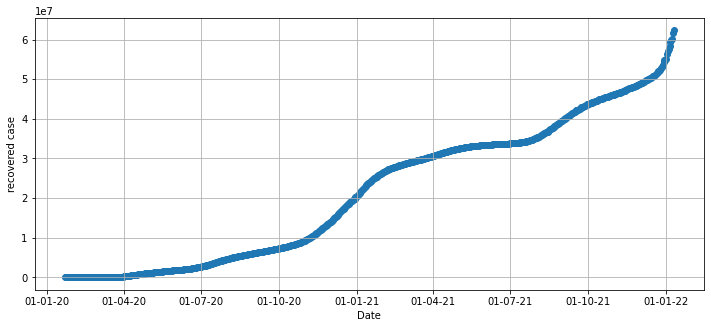

In [29]:
fig, ax = plt.subplots(figsize=(12, 5 ))
ax.grid()
ax.scatter(date_format,y_value1['Values'])
ax.set(xlabel="Date",ylabel="recovered case")
date_form = DateFormatter('%d-%m-%y')
#print(date_form)
ax.xaxis.set_major_formatter(date_form)
#ax.xaxis.set_major_locator(mdates.DayLocator(interval = 15))
plt.show()

In [30]:
df1['Time'] = np.arange(len(df1.index))

In [31]:
print(df1)

       Title                                             Values  Time
0        UID                                       278822801147     0
1       iso2  USUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUS...     1
2       iso3  USAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAUSAU...     2
3      code3                                            2788882     3
4       FIPS                                        110099539.0     4
..       ...                                                ...   ...
726   1/6/22                                           59388686   726
727   1/7/22                                           59767418   727
728   1/8/22                                           60090560   728
729   1/9/22                                           61556085   729
730  1/10/22                                           62308472   730

[731 rows x 3 columns]


In [33]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import scale 
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

# Training data
X = df1.loc[11:500, ['Time']]  # features
y = df1.loc[11:500, 'Values']  # target

reg = Lasso(alpha=1)
reg.fit(X,y)

y_pred1 = pd.Series(reg.predict(X), index=X.index)
print(y_pred1)

11    -7.429776e+06
12    -7.349639e+06
13    -7.269502e+06
14    -7.189365e+06
15    -7.109229e+06
           ...     
496    3.143659e+07
497    3.151672e+07
498    3.159686e+07
499    3.167700e+07
500    3.175713e+07
Length: 490, dtype: float64


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from skle

Time    79000.912103
dtype: float64

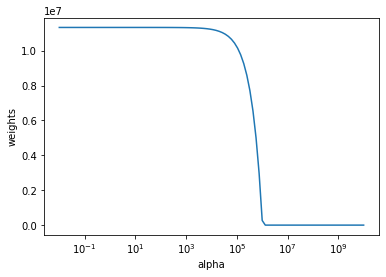

In [34]:
alphas = 10**np.linspace(10,-2,100)*0.5

lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X), y)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X, y)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X, y)
mean_squared_error(y, lasso.predict(X))
pd.Series(lasso.coef_, index=X.columns)



In [37]:
from sklearn.linear_model import LinearRegression

# Training data
X = df1.loc[11:500, ['Time']]  # features
y = df1.loc[11:500, 'Values']  # target

# Train the model
model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

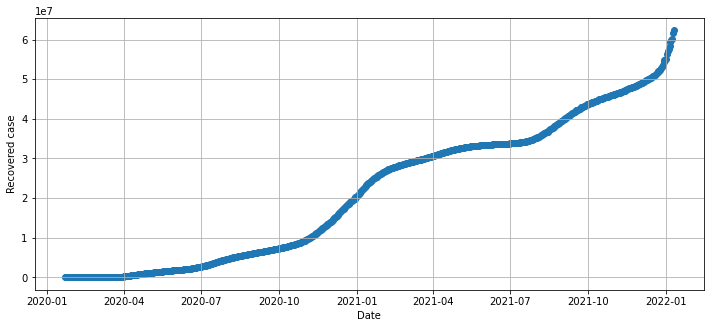

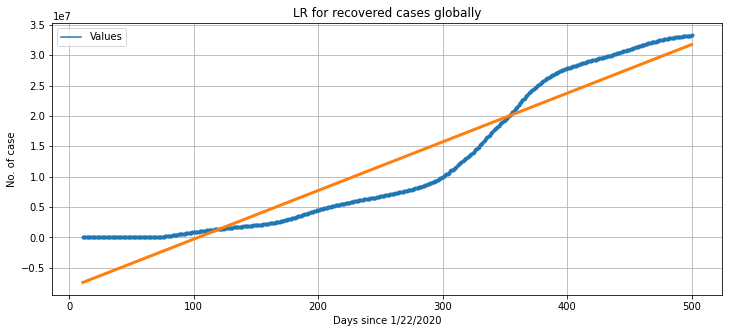

In [38]:
plot_params = dict(
    style=".-",
    legend=True,
)

fig, ax = plt.subplots(figsize=(12, 5 ))
ax.grid()
ax.scatter(date_format,y_value1['Values'])
ax.set(xlabel="Date",ylabel="Recovered case")

fig, ax = plt.subplots(figsize=(12, 5 ))
ax = y.plot(**plot_params)
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title('LR for recovered cases globally');
ax.set(xlabel="Days since 1/22/2020",ylabel="No. of case")
ax.grid();

